In [2]:
!head -n 20 transfusion.data

In [3]:
import pandas as pd

transfusion = pd.read_csv("transfusion.data")

transfusion.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [276]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
# Target is to predict whether he/she donated blood in March 2007

In [277]:
# chnge 'whether he/she donated blood in March 2007' name to target
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

In [278]:
transfusion.target.value_counts(normalize=True).round(5)

0    0.76203
1    0.23797
Name: target, dtype: float64

In [279]:
type(transfusion)


pandas.core.frame.DataFrame

In [280]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [281]:
transfusion.iloc[:, 0:4]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [11]:
transfusion.iloc[:, 0:4].describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [12]:
transfusion[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


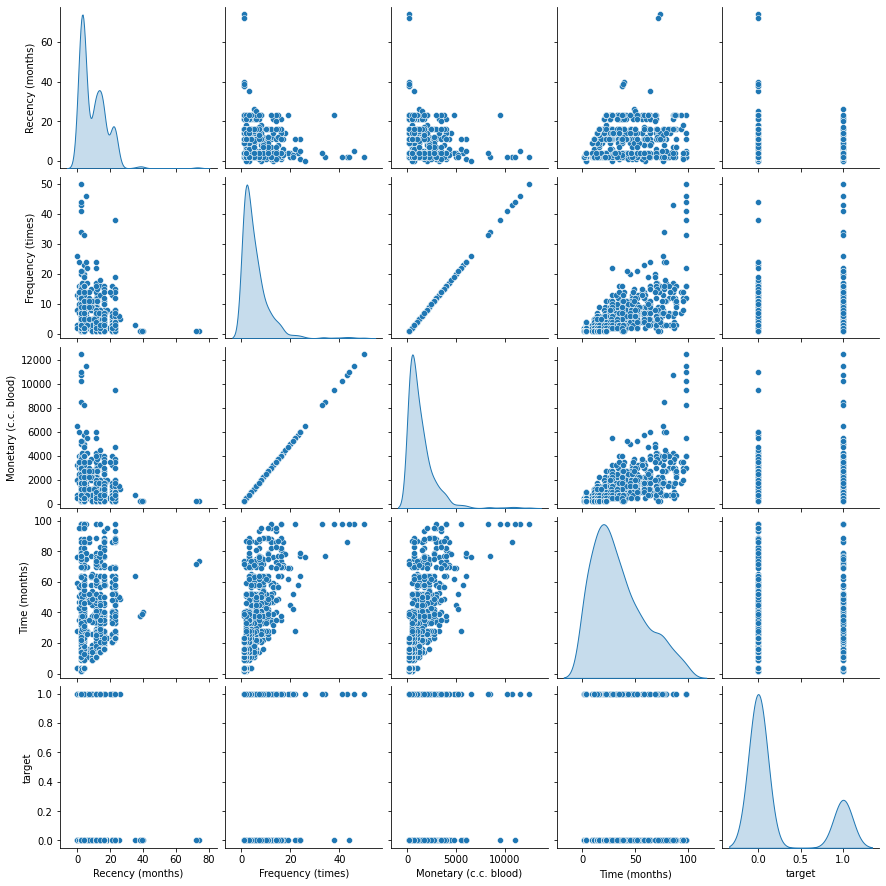

In [282]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(transfusion, diag_kind="kde")

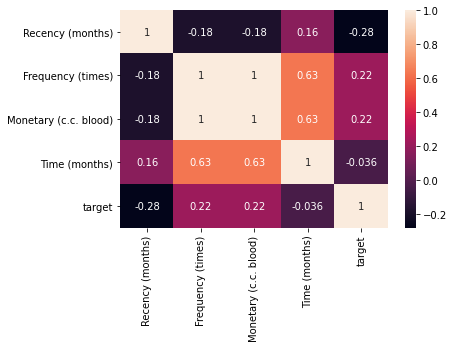

In [286]:
sb.heatmap(transfusion.corr(), annot=True)

In [40]:
tran_data = transfusion[['Recency (months)', 'Frequency (times)', 'Time (months)']]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tran_data)

In [44]:
import pandas as pd

scaled_data_tran = pd.DataFrame(scaled_data)
scaled_data_tran.describe()

,0,1,2
count,7.480000e+02,7.480000e+02,7.480000e+02
mean,3.799694e-17,-1.899847e-17,3.799694e-17
std,1.000669e+00,1.000669e+00,1.000669e+00
min,-1.175118e+00,-7.736751e-01,-1.325186e+00
25%,-8.351915e-01,-6.023074e-01,-7.504834e-01
50%,-3.098504e-01,-2.595718e-01,-2.578809e-01
75%,5.554172e-01,2.545316e-01,6.452236e-01
max,7.971997e+00,7.623346e+00,2.615633e+00


In [45]:
scaled_data_tran.head()

,0,1,2
0,-0.927899,7.623346,2.615633
1,-1.175118,1.282738,-0.257881
2,-1.051508,1.796842,0.029471
3,-0.927899,2.482313,0.439973
4,-1.051508,3.167784,1.753579


In [46]:
scaled_data_tran['target'] = transfusion.iloc[:,4]

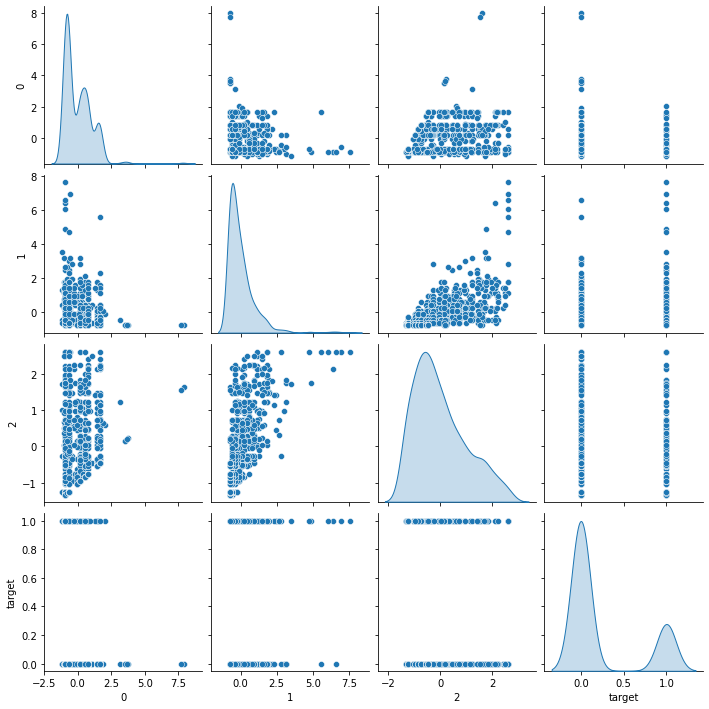

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(scaled_data_tran, diag_kind="kde")

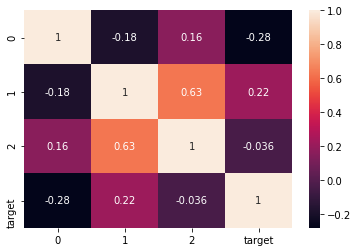

In [48]:
import seaborn as sb

sb.heatmap(scaled_data_tran.corr(), annot=True)

In [49]:
scaled_data_tran

,0,1,2,target
0,-0.927899,7.623346,2.615633,1
1,-1.175118,1.282738,-0.257881,1
2,-1.051508,1.796842,0.029471,1
3,-0.927899,2.482313,0.439973,1
4,-1.051508,3.167784,1.753579,0
...,...,...,...,...
743,1.667904,-0.602307,0.152621,0
744,1.420685,-0.602307,0.727324,0
745,1.667904,-0.430940,1.137826,0
746,3.645659,-0.773675,0.193671,0


In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_data_tran.drop(columns='target'),
    scaled_data_tran.target,
    test_size=0.15
)

X_train.head(10)

,0,1,2
503,-0.927899,6.595140,2.615633
344,0.184588,-0.773675,-0.955734
140,-0.927899,0.597267,1.630429
54,-0.680679,-0.088204,-0.832584
433,0.555417,-0.259572,1.219926
49,-0.927899,-0.602307,-1.325186
621,-0.680679,-0.773675,-1.243086
424,0.555417,-0.259572,0.932575
248,0.184588,-0.602307,-0.955734
695,0.926246,0.254532,0.973625


In [216]:
y_train.head(10)

193    0
392    0
640    1
232    0
481    0
635    0
578    0
72     1
341    0
424    0
Name: target, dtype: int64

In [22]:
#Building neural network

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dropout

#set seed for reproduction purpose
from numpy.random import seed
seed(1) 

import tensorflow as tf
tf.random.set_seed(2)

import random as rn
rn.seed(12345)

tf.random.set_seed(1234)

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

act = ['relu', 'swish']

for ac in act:
    for ac2 in act:
        for x in range(15,30):
            for y in range(10,15):
                for z in range(5,10):
                    neural_network = Sequential()
                    neural_network.add(Dense(x, activation= ac, input_shape=(3,)))
                    neural_network.add(Dense(y, activation= ac2))
                    neural_network.add(Dropout(0.2))
                    neural_network.add(Dense(z, activation= ac))
                    neural_network.add(Dropout(0.2))
                    neural_network.add(Dense(1, activation='sigmoid'))
                    neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
                    run_hist = neural_network.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),\
                                                      verbose=False, shuffle=False)
                    print(f'Model for 1:{x}, 2: {y}, 3: {z} act: {ac}, act2:{ac2}', neural_network.evaluate(X_test, y_test))

5/5 [==============================] - 0s 2ms/step - loss: 0.4185 - binary_accuracy: 0.8400
Model for 1:15, 2: 10, 3: 5 act: relu, act2:relu [0.4184511601924896, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4147 - binary_accuracy: 0.8467
Model for 1:15, 2: 10, 3: 6 act: relu, act2:relu [0.41474634408950806, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4175 - binary_accuracy: 0.7933
Model for 1:15, 2: 10, 3: 7 act: relu, act2:relu [0.4175395369529724, 0.7933333516120911]
5/5 [==============================] - 0s 1ms/step - loss: 0.4345 - binary_accuracy: 0.7667
Model for 1:15, 2: 10, 3: 8 act: relu, act2:relu [0.4345482885837555, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4233 - binary_accuracy: 0.7667
Model for 1:15, 2: 10, 3: 9 act: relu, act2:relu [0.42325690388679504, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4216 - binary_accuracy: 0.83

5/5 [==============================] - 0s 988us/step - loss: 0.4216 - binary_accuracy: 0.8400
Model for 1:16, 2: 14, 3: 5 act: relu, act2:relu [0.42156505584716797, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4131 - binary_accuracy: 0.8467
Model for 1:16, 2: 14, 3: 6 act: relu, act2:relu [0.41312357783317566, 0.846666693687439]
5/5 [==============================] - 0s 814us/step - loss: 0.4158 - binary_accuracy: 0.8467
Model for 1:16, 2: 14, 3: 7 act: relu, act2:relu [0.41577866673469543, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4065 - binary_accuracy: 0.8533
Model for 1:16, 2: 14, 3: 8 act: relu, act2:relu [0.40648460388183594, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4136 - binary_accuracy: 0.8133
Model for 1:16, 2: 14, 3: 9 act: relu, act2:relu [0.41359585523605347, 0.8133333325386047]
5/5 [==============================] - 0s 1ms/step - loss: 0.4272 - binary_accuracy

5/5 [==============================] - 0s 1ms/step - loss: 0.4227 - binary_accuracy: 0.8133
Model for 1:18, 2: 13, 3: 5 act: relu, act2:relu [0.42266854643821716, 0.8133333325386047]
5/5 [==============================] - 0s 1ms/step - loss: 0.4328 - binary_accuracy: 0.7667
Model for 1:18, 2: 13, 3: 6 act: relu, act2:relu [0.4328460097312927, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4130 - binary_accuracy: 0.8467
Model for 1:18, 2: 13, 3: 7 act: relu, act2:relu [0.4129766523838043, 0.846666693687439]
5/5 [==============================] - 0s 898us/step - loss: 0.4167 - binary_accuracy: 0.8467
Model for 1:18, 2: 13, 3: 8 act: relu, act2:relu [0.4167269766330719, 0.846666693687439]
5/5 [==============================] - 0s 846us/step - loss: 0.4051 - binary_accuracy: 0.8467
Model for 1:18, 2: 13, 3: 9 act: relu, act2:relu [0.40512076020240784, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4191 - binary_accuracy: 0.

5/5 [==============================] - 0s 968us/step - loss: 0.4263 - binary_accuracy: 0.8400
Model for 1:20, 2: 12, 3: 5 act: relu, act2:relu [0.4263424575328827, 0.8399999737739563]
5/5 [==============================] - 0s 2ms/step - loss: 0.4102 - binary_accuracy: 0.8467
Model for 1:20, 2: 12, 3: 6 act: relu, act2:relu [0.41020822525024414, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4140 - binary_accuracy: 0.8467
Model for 1:20, 2: 12, 3: 7 act: relu, act2:relu [0.413998007774353, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4171 - binary_accuracy: 0.8333
Model for 1:20, 2: 12, 3: 8 act: relu, act2:relu [0.417122483253479, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4197 - binary_accuracy: 0.8267
Model for 1:20, 2: 12, 3: 9 act: relu, act2:relu [0.419697105884552, 0.8266666531562805]
5/5 [==============================] - 0s 1ms/step - loss: 0.4139 - binary_accuracy: 0.8533


5/5 [==============================] - 0s 949us/step - loss: 0.4346 - binary_accuracy: 0.7667
Model for 1:22, 2: 11, 3: 5 act: relu, act2:relu [0.4346155822277069, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4145 - binary_accuracy: 0.8467
Model for 1:22, 2: 11, 3: 6 act: relu, act2:relu [0.41449108719825745, 0.846666693687439]
5/5 [==============================] - 0s 806us/step - loss: 0.4116 - binary_accuracy: 0.8467
Model for 1:22, 2: 11, 3: 7 act: relu, act2:relu [0.4115813076496124, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4118 - binary_accuracy: 0.8533
Model for 1:22, 2: 11, 3: 8 act: relu, act2:relu [0.4117692708969116, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4060 - binary_accuracy: 0.8467
Model for 1:22, 2: 11, 3: 9 act: relu, act2:relu [0.405950665473938, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4166 - binary_accuracy: 0.85

5/5 [==============================] - 0s 1ms/step - loss: 0.4199 - binary_accuracy: 0.8267
Model for 1:24, 2: 10, 3: 5 act: relu, act2:relu [0.4198724925518036, 0.8266666531562805]
5/5 [==============================] - 0s 1ms/step - loss: 0.4171 - binary_accuracy: 0.8333
Model for 1:24, 2: 10, 3: 6 act: relu, act2:relu [0.41712266206741333, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4205 - binary_accuracy: 0.8333
Model for 1:24, 2: 10, 3: 7 act: relu, act2:relu [0.4205056130886078, 0.8333333134651184]
5/5 [==============================] - 0s 939us/step - loss: 0.4076 - binary_accuracy: 0.8533
Model for 1:24, 2: 10, 3: 8 act: relu, act2:relu [0.40763184428215027, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4110 - binary_accuracy: 0.8467
Model for 1:24, 2: 10, 3: 9 act: relu, act2:relu [0.41104307770729065, 0.846666693687439]
5/5 [==============================] - 0s 978us/step - loss: 0.4096 - binary_accuracy:

5/5 [==============================] - 0s 1ms/step - loss: 0.4100 - binary_accuracy: 0.8533
Model for 1:25, 2: 14, 3: 5 act: relu, act2:relu [0.40995675325393677, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4052 - binary_accuracy: 0.8467
Model for 1:25, 2: 14, 3: 6 act: relu, act2:relu [0.40517348051071167, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4075 - binary_accuracy: 0.8533
Model for 1:25, 2: 14, 3: 7 act: relu, act2:relu [0.4075292646884918, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4053 - binary_accuracy: 0.8467
Model for 1:25, 2: 14, 3: 8 act: relu, act2:relu [0.4053496718406677, 0.846666693687439]
5/5 [==============================] - 0s 943us/step - loss: 0.4092 - binary_accuracy: 0.8467
Model for 1:25, 2: 14, 3: 9 act: relu, act2:relu [0.40922555327415466, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4170 - binary_accuracy: 0.8

5/5 [==============================] - 0s 1ms/step - loss: 0.4283 - binary_accuracy: 0.7667
Model for 1:27, 2: 13, 3: 5 act: relu, act2:relu [0.42825865745544434, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4181 - binary_accuracy: 0.8467
Model for 1:27, 2: 13, 3: 6 act: relu, act2:relu [0.4181004762649536, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4057 - binary_accuracy: 0.8533
Model for 1:27, 2: 13, 3: 7 act: relu, act2:relu [0.40570908784866333, 0.8533333539962769]
5/5 [==============================] - 0s 2ms/step - loss: 0.4143 - binary_accuracy: 0.8533
Model for 1:27, 2: 13, 3: 8 act: relu, act2:relu [0.4143374562263489, 0.8533333539962769]
5/5 [==============================] - 0s 968us/step - loss: 0.4043 - binary_accuracy: 0.8467
Model for 1:27, 2: 13, 3: 9 act: relu, act2:relu [0.40434572100639343, 0.846666693687439]
5/5 [==============================] - 0s 900us/step - loss: 0.4094 - binary_accuracy: 

5/5 [==============================] - 0s 829us/step - loss: 0.4136 - binary_accuracy: 0.8467
Model for 1:29, 2: 12, 3: 5 act: relu, act2:relu [0.4136384129524231, 0.846666693687439]
5/5 [==============================] - 0s 901us/step - loss: 0.4183 - binary_accuracy: 0.8467
Model for 1:29, 2: 12, 3: 6 act: relu, act2:relu [0.41833633184432983, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4095 - binary_accuracy: 0.8533
Model for 1:29, 2: 12, 3: 7 act: relu, act2:relu [0.40947091579437256, 0.8533333539962769]
5/5 [==============================] - 0s 2ms/step - loss: 0.4039 - binary_accuracy: 0.8467
Model for 1:29, 2: 12, 3: 8 act: relu, act2:relu [0.4038751721382141, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4122 - binary_accuracy: 0.8467
Model for 1:29, 2: 12, 3: 9 act: relu, act2:relu [0.41222476959228516, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4169 - binary_accuracy: 0.

5/5 [==============================] - 0s 1ms/step - loss: 0.4147 - binary_accuracy: 0.8533
Model for 1:16, 2: 11, 3: 5 act: relu, act2:swish [0.4147428274154663, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4066 - binary_accuracy: 0.8533
Model for 1:16, 2: 11, 3: 6 act: relu, act2:swish [0.4066360890865326, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4049 - binary_accuracy: 0.8467
Model for 1:16, 2: 11, 3: 7 act: relu, act2:swish [0.40491586923599243, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4070 - binary_accuracy: 0.8467
Model for 1:16, 2: 11, 3: 8 act: relu, act2:swish [0.40698471665382385, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4127 - binary_accuracy: 0.8400
Model for 1:16, 2: 11, 3: 9 act: relu, act2:swish [0.4126572608947754, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4133 - binary_accuracy: 

5/5 [==============================] - 0s 1ms/step - loss: 0.4128 - binary_accuracy: 0.8467
Model for 1:18, 2: 10, 3: 5 act: relu, act2:swish [0.4128025770187378, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4124 - binary_accuracy: 0.8533
Model for 1:18, 2: 10, 3: 6 act: relu, act2:swish [0.41238296031951904, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4075 - binary_accuracy: 0.8533
Model for 1:18, 2: 10, 3: 7 act: relu, act2:swish [0.4075332581996918, 0.8533333539962769]
5/5 [==============================] - 0s 847us/step - loss: 0.4038 - binary_accuracy: 0.8467
Model for 1:18, 2: 10, 3: 8 act: relu, act2:swish [0.4038076400756836, 0.846666693687439]
5/5 [==============================] - 0s 849us/step - loss: 0.4254 - binary_accuracy: 0.7667
Model for 1:18, 2: 10, 3: 9 act: relu, act2:swish [0.42543718218803406, 0.7666666507720947]
5/5 [==============================] - 0s 961us/step - loss: 0.4065 - binary_accu

5/5 [==============================] - 0s 1ms/step - loss: 0.4125 - binary_accuracy: 0.8467
Model for 1:19, 2: 14, 3: 5 act: relu, act2:swish [0.4124799370765686, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4218 - binary_accuracy: 0.8133
Model for 1:19, 2: 14, 3: 6 act: relu, act2:swish [0.42177829146385193, 0.8133333325386047]
5/5 [==============================] - 0s 1ms/step - loss: 0.4066 - binary_accuracy: 0.8533
Model for 1:19, 2: 14, 3: 7 act: relu, act2:swish [0.4065956473350525, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4008 - binary_accuracy: 0.8467
Model for 1:19, 2: 14, 3: 8 act: relu, act2:swish [0.4008317291736603, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.3997 - binary_accuracy: 0.8467
Model for 1:19, 2: 14, 3: 9 act: relu, act2:swish [0.39972105622291565, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.5095 - binary_accuracy: 0

5/5 [==============================] - 0s 1ms/step - loss: 0.4041 - binary_accuracy: 0.8533
Model for 1:21, 2: 13, 3: 5 act: relu, act2:swish [0.4040885865688324, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4065 - binary_accuracy: 0.8467
Model for 1:21, 2: 13, 3: 6 act: relu, act2:swish [0.406526654958725, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4007 - binary_accuracy: 0.8467
Model for 1:21, 2: 13, 3: 7 act: relu, act2:swish [0.4007287621498108, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4060 - binary_accuracy: 0.8467
Model for 1:21, 2: 13, 3: 8 act: relu, act2:swish [0.40596145391464233, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4016 - binary_accuracy: 0.8467
Model for 1:21, 2: 13, 3: 9 act: relu, act2:swish [0.4015553891658783, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.84

5/5 [==============================] - 0s 1ms/step - loss: 0.4153 - binary_accuracy: 0.8533
Model for 1:23, 2: 12, 3: 5 act: relu, act2:swish [0.4152583181858063, 0.8533333539962769]
5/5 [==============================] - 0s 868us/step - loss: 0.4087 - binary_accuracy: 0.8467
Model for 1:23, 2: 12, 3: 6 act: relu, act2:swish [0.40874531865119934, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4084 - binary_accuracy: 0.8467
Model for 1:23, 2: 12, 3: 7 act: relu, act2:swish [0.408401757478714, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4061 - binary_accuracy: 0.8467
Model for 1:23, 2: 12, 3: 8 act: relu, act2:swish [0.406143456697464, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4056 - binary_accuracy: 0.8467
Model for 1:23, 2: 12, 3: 9 act: relu, act2:swish [0.4055984914302826, 0.846666693687439]
5/5 [==============================] - 0s 982us/step - loss: 0.4183 - binary_accuracy: 0

5/5 [==============================] - 0s 992us/step - loss: 0.4106 - binary_accuracy: 0.8533
Model for 1:25, 2: 11, 3: 5 act: relu, act2:swish [0.41064321994781494, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4239 - binary_accuracy: 0.7667
Model for 1:25, 2: 11, 3: 6 act: relu, act2:swish [0.42392998933792114, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8467
Model for 1:25, 2: 11, 3: 7 act: relu, act2:swish [0.4067399799823761, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4048 - binary_accuracy: 0.8467
Model for 1:25, 2: 11, 3: 8 act: relu, act2:swish [0.40476492047309875, 0.846666693687439]
5/5 [==============================] - 0s 937us/step - loss: 0.4040 - binary_accuracy: 0.8533
Model for 1:25, 2: 11, 3: 9 act: relu, act2:swish [0.4039749205112457, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4254 - binary_accur

5/5 [==============================] - 0s 1ms/step - loss: 0.4131 - binary_accuracy: 0.8533
Model for 1:27, 2: 10, 3: 5 act: relu, act2:swish [0.41313275694847107, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4037 - binary_accuracy: 0.8467
Model for 1:27, 2: 10, 3: 6 act: relu, act2:swish [0.4036569595336914, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4146 - binary_accuracy: 0.8467
Model for 1:27, 2: 10, 3: 7 act: relu, act2:swish [0.41457319259643555, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4033 - binary_accuracy: 0.8467
Model for 1:27, 2: 10, 3: 8 act: relu, act2:swish [0.4032713770866394, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4035 - binary_accuracy: 0.8467
Model for 1:27, 2: 10, 3: 9 act: relu, act2:swish [0.4035041332244873, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4090 - binary_accuracy: 0.

5/5 [==============================] - 0s 1ms/step - loss: 0.4223 - binary_accuracy: 0.7667
Model for 1:28, 2: 14, 3: 5 act: relu, act2:swish [0.42233216762542725, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4007 - binary_accuracy: 0.8467
Model for 1:28, 2: 14, 3: 6 act: relu, act2:swish [0.4007180333137512, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4046 - binary_accuracy: 0.8467
Model for 1:28, 2: 14, 3: 7 act: relu, act2:swish [0.40464162826538086, 0.846666693687439]
5/5 [==============================] - 0s 990us/step - loss: 0.4059 - binary_accuracy: 0.8467
Model for 1:28, 2: 14, 3: 8 act: relu, act2:swish [0.40587738156318665, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4026 - binary_accuracy: 0.8467
Model for 1:28, 2: 14, 3: 9 act: relu, act2:swish [0.40257591009140015, 0.846666693687439]
5/5 [==============================] - 0s 968us/step - loss: 0.4106 - binary_accura

5/5 [==============================] - 0s 1ms/step - loss: 0.4133 - binary_accuracy: 0.8467
Model for 1:15, 2: 13, 3: 5 act: swish, act2:relu [0.4133175015449524, 0.846666693687439]
5/5 [==============================] - 0s 837us/step - loss: 0.4224 - binary_accuracy: 0.8333
Model for 1:15, 2: 13, 3: 6 act: swish, act2:relu [0.4224272668361664, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4103 - binary_accuracy: 0.8400
Model for 1:15, 2: 13, 3: 7 act: swish, act2:relu [0.4102555215358734, 0.8399999737739563]
5/5 [==============================] - 0s 771us/step - loss: 0.4078 - binary_accuracy: 0.8400
Model for 1:15, 2: 13, 3: 8 act: swish, act2:relu [0.40779897570610046, 0.8399999737739563]
5/5 [==============================] - 0s 863us/step - loss: 0.4067 - binary_accuracy: 0.8400
Model for 1:15, 2: 13, 3: 9 act: swish, act2:relu [0.40669071674346924, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4113 - binary_acc

5/5 [==============================] - 0s 910us/step - loss: 0.4238 - binary_accuracy: 0.8333
Model for 1:17, 2: 12, 3: 5 act: swish, act2:relu [0.42381352186203003, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4098 - binary_accuracy: 0.8467
Model for 1:17, 2: 12, 3: 6 act: swish, act2:relu [0.4098016917705536, 0.846666693687439]
5/5 [==============================] - 0s 981us/step - loss: 0.4124 - binary_accuracy: 0.8467
Model for 1:17, 2: 12, 3: 7 act: swish, act2:relu [0.41244935989379883, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4075 - binary_accuracy: 0.8400
Model for 1:17, 2: 12, 3: 8 act: swish, act2:relu [0.40750423073768616, 0.8399999737739563]
5/5 [==============================] - 0s 961us/step - loss: 0.4120 - binary_accuracy: 0.8467
Model for 1:17, 2: 12, 3: 9 act: swish, act2:relu [0.4120364785194397, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4110 - binary_accu

5/5 [==============================] - 0s 1ms/step - loss: 0.4163 - binary_accuracy: 0.8400
Model for 1:19, 2: 11, 3: 5 act: swish, act2:relu [0.4163106679916382, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8400
Model for 1:19, 2: 11, 3: 6 act: swish, act2:relu [0.40669623017311096, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8400
Model for 1:19, 2: 11, 3: 7 act: swish, act2:relu [0.40826910734176636, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4082 - binary_accuracy: 0.8400
Model for 1:19, 2: 11, 3: 8 act: swish, act2:relu [0.408218652009964, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4142 - binary_accuracy: 0.8333
Model for 1:19, 2: 11, 3: 9 act: swish, act2:relu [0.414232075214386, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4173 - binary_accuracy: 

5/5 [==============================] - 0s 1ms/step - loss: 0.4175 - binary_accuracy: 0.8200
Model for 1:21, 2: 10, 3: 5 act: swish, act2:relu [0.4175281524658203, 0.8199999928474426]
5/5 [==============================] - 0s 994us/step - loss: 0.4140 - binary_accuracy: 0.8467
Model for 1:21, 2: 10, 3: 6 act: swish, act2:relu [0.4139954447746277, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4121 - binary_accuracy: 0.8333
Model for 1:21, 2: 10, 3: 7 act: swish, act2:relu [0.4121203124523163, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4087 - binary_accuracy: 0.8400
Model for 1:21, 2: 10, 3: 8 act: swish, act2:relu [0.4086855351924896, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4096 - binary_accuracy: 0.8400
Model for 1:21, 2: 10, 3: 9 act: swish, act2:relu [0.4096347391605377, 0.8399999737739563]
5/5 [==============================] - 0s 987us/step - loss: 0.4165 - binary_accurac

5/5 [==============================] - 0s 1ms/step - loss: 0.4116 - binary_accuracy: 0.8467
Model for 1:22, 2: 14, 3: 5 act: swish, act2:relu [0.4116458594799042, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4099 - binary_accuracy: 0.8467
Model for 1:22, 2: 14, 3: 6 act: swish, act2:relu [0.4099264442920685, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4066 - binary_accuracy: 0.8533
Model for 1:22, 2: 14, 3: 7 act: swish, act2:relu [0.4065955579280853, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4028 - binary_accuracy: 0.8467
Model for 1:22, 2: 14, 3: 8 act: swish, act2:relu [0.40283888578414917, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4004 - binary_accuracy: 0.8467
Model for 1:22, 2: 14, 3: 9 act: swish, act2:relu [0.40036436915397644, 0.846666693687439]
5/5 [==============================] - 0s 946us/step - loss: 0.4130 - binary_accuracy: 

5/5 [==============================] - 0s 1ms/step - loss: 0.4276 - binary_accuracy: 0.8000
Model for 1:24, 2: 13, 3: 5 act: swish, act2:relu [0.42760568857192993, 0.800000011920929]
5/5 [==============================] - 0s 1ms/step - loss: 0.4153 - binary_accuracy: 0.8467
Model for 1:24, 2: 13, 3: 6 act: swish, act2:relu [0.4153498709201813, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4040 - binary_accuracy: 0.8467
Model for 1:24, 2: 13, 3: 7 act: swish, act2:relu [0.40402862429618835, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4091 - binary_accuracy: 0.8467
Model for 1:24, 2: 13, 3: 8 act: swish, act2:relu [0.40911388397216797, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4078 - binary_accuracy: 0.8467
Model for 1:24, 2: 13, 3: 9 act: swish, act2:relu [0.40781673789024353, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4101 - binary_accuracy: 0

5/5 [==============================] - 0s 1000us/step - loss: 0.4153 - binary_accuracy: 0.8333
Model for 1:26, 2: 12, 3: 5 act: swish, act2:relu [0.4152781069278717, 0.8333333134651184]
5/5 [==============================] - 0s 998us/step - loss: 0.4115 - binary_accuracy: 0.8400
Model for 1:26, 2: 12, 3: 6 act: swish, act2:relu [0.41153690218925476, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4088 - binary_accuracy: 0.8533
Model for 1:26, 2: 12, 3: 7 act: swish, act2:relu [0.40881404280662537, 0.8533333539962769]
5/5 [==============================] - 0s 1ms/step - loss: 0.4072 - binary_accuracy: 0.8400
Model for 1:26, 2: 12, 3: 8 act: swish, act2:relu [0.4072338342666626, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4046 - binary_accuracy: 0.8467
Model for 1:26, 2: 12, 3: 9 act: swish, act2:relu [0.4045838415622711, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4146 - binary_accu

5/5 [==============================] - 0s 1ms/step - loss: 0.4157 - binary_accuracy: 0.8400
Model for 1:28, 2: 11, 3: 5 act: swish, act2:relu [0.41568633913993835, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4113 - binary_accuracy: 0.8467
Model for 1:28, 2: 11, 3: 6 act: swish, act2:relu [0.4112972915172577, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4335 - binary_accuracy: 0.7667
Model for 1:28, 2: 11, 3: 7 act: swish, act2:relu [0.4335237741470337, 0.7666666507720947]
5/5 [==============================] - 0s 1ms/step - loss: 0.4147 - binary_accuracy: 0.8400
Model for 1:28, 2: 11, 3: 8 act: swish, act2:relu [0.41466426849365234, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4060 - binary_accuracy: 0.8400
Model for 1:28, 2: 11, 3: 9 act: swish, act2:relu [0.40603959560394287, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4119 - binary_accuracy

5/5 [==============================] - 0s 1ms/step - loss: 0.4212 - binary_accuracy: 0.8333
Model for 1:15, 2: 10, 3: 5 act: swish, act2:swish [0.421158105134964, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4171 - binary_accuracy: 0.8400
Model for 1:15, 2: 10, 3: 6 act: swish, act2:swish [0.41710489988327026, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4068 - binary_accuracy: 0.8400
Model for 1:15, 2: 10, 3: 7 act: swish, act2:swish [0.40680962800979614, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4227 - binary_accuracy: 0.8333
Model for 1:15, 2: 10, 3: 8 act: swish, act2:swish [0.4226914048194885, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4136 - binary_accuracy: 0.8333
Model for 1:15, 2: 10, 3: 9 act: swish, act2:swish [0.4135685861110687, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4131 - binary_accu

Model for 1:16, 2: 13, 3: 9 act: swish, act2:swish [0.4053525924682617, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4136 - binary_accuracy: 0.8333
Model for 1:16, 2: 14, 3: 5 act: swish, act2:swish [0.41355177760124207, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4058 - binary_accuracy: 0.8467
Model for 1:16, 2: 14, 3: 6 act: swish, act2:swish [0.4057806134223938, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4063 - binary_accuracy: 0.8400
Model for 1:16, 2: 14, 3: 7 act: swish, act2:swish [0.40629979968070984, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4098 - binary_accuracy: 0.8400
Model for 1:16, 2: 14, 3: 8 act: swish, act2:swish [0.40979325771331787, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4103 - binary_accuracy: 0.8333
Model for 1:16, 2: 14, 3: 9 act: swish, act2:swish [0.41029593348503113, 0.8333

5/5 [==============================] - 0s 1ms/step - loss: 0.4074 - binary_accuracy: 0.8467
Model for 1:18, 2: 12, 3: 9 act: swish, act2:swish [0.40736016631126404, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4125 - binary_accuracy: 0.8400
Model for 1:18, 2: 13, 3: 5 act: swish, act2:swish [0.41245678067207336, 0.8399999737739563]
5/5 [==============================] - 0s 994us/step - loss: 0.4079 - binary_accuracy: 0.8467
Model for 1:18, 2: 13, 3: 6 act: swish, act2:swish [0.4079475402832031, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4099 - binary_accuracy: 0.8400
Model for 1:18, 2: 13, 3: 7 act: swish, act2:swish [0.40986162424087524, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4052 - binary_accuracy: 0.8467
Model for 1:18, 2: 13, 3: 8 act: swish, act2:swish [0.4051987826824188, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4079 - binary_acc

5/5 [==============================] - 0s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8400
Model for 1:20, 2: 11, 3: 8 act: swish, act2:swish [0.4082602858543396, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4072 - binary_accuracy: 0.8400
Model for 1:20, 2: 11, 3: 9 act: swish, act2:swish [0.40723082423210144, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4163 - binary_accuracy: 0.8467
Model for 1:20, 2: 12, 3: 5 act: swish, act2:swish [0.41626960039138794, 0.846666693687439]
5/5 [==============================] - 0s 982us/step - loss: 0.4146 - binary_accuracy: 0.8333
Model for 1:20, 2: 12, 3: 6 act: swish, act2:swish [0.4146413505077362, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4041 - binary_accuracy: 0.8467
Model for 1:20, 2: 12, 3: 7 act: swish, act2:swish [0.4040582478046417, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4091 - binary_acc

5/5 [==============================] - 0s 1ms/step - loss: 0.4082 - binary_accuracy: 0.8333
Model for 1:22, 2: 10, 3: 7 act: swish, act2:swish [0.40816983580589294, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4089 - binary_accuracy: 0.8400
Model for 1:22, 2: 10, 3: 8 act: swish, act2:swish [0.4088592529296875, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4084 - binary_accuracy: 0.8400
Model for 1:22, 2: 10, 3: 9 act: swish, act2:swish [0.40842604637145996, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4154 - binary_accuracy: 0.8333
Model for 1:22, 2: 11, 3: 5 act: swish, act2:swish [0.41538041830062866, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4147 - binary_accuracy: 0.8467
Model for 1:22, 2: 11, 3: 6 act: swish, act2:swish [0.41465866565704346, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4066 - binary_ac

5/5 [==============================] - 0s 995us/step - loss: 0.4066 - binary_accuracy: 0.8467
Model for 1:23, 2: 14, 3: 6 act: swish, act2:swish [0.4065563976764679, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4087 - binary_accuracy: 0.8333
Model for 1:23, 2: 14, 3: 7 act: swish, act2:swish [0.4086858630180359, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8400
Model for 1:23, 2: 14, 3: 8 act: swish, act2:swish [0.4067464768886566, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4076 - binary_accuracy: 0.8467
Model for 1:23, 2: 14, 3: 9 act: swish, act2:swish [0.4076009690761566, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4152 - binary_accuracy: 0.8333
Model for 1:24, 2: 10, 3: 5 act: swish, act2:swish [0.41523855924606323, 0.8333333134651184]
5/5 [==============================] - 0s 892us/step - loss: 0.4156 - binary_ac

5/5 [==============================] - 0s 857us/step - loss: 0.4108 - binary_accuracy: 0.8400
Model for 1:25, 2: 13, 3: 5 act: swish, act2:swish [0.4107505679130554, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4081 - binary_accuracy: 0.8467
Model for 1:25, 2: 13, 3: 6 act: swish, act2:swish [0.40814676880836487, 0.846666693687439]
5/5 [==============================] - 0s 892us/step - loss: 0.4045 - binary_accuracy: 0.8467
Model for 1:25, 2: 13, 3: 7 act: swish, act2:swish [0.4045153856277466, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4064 - binary_accuracy: 0.8467
Model for 1:25, 2: 13, 3: 8 act: swish, act2:swish [0.406369149684906, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4075 - binary_accuracy: 0.8400
Model for 1:25, 2: 13, 3: 9 act: swish, act2:swish [0.4074980914592743, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4118 - binary_accu

5/5 [==============================] - 0s 1ms/step - loss: 0.4079 - binary_accuracy: 0.8400
Model for 1:27, 2: 11, 3: 9 act: swish, act2:swish [0.40790480375289917, 0.8399999737739563]
5/5 [==============================] - 0s 1000us/step - loss: 0.4124 - binary_accuracy: 0.8467
Model for 1:27, 2: 12, 3: 5 act: swish, act2:swish [0.4123769998550415, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4093 - binary_accuracy: 0.8467
Model for 1:27, 2: 12, 3: 6 act: swish, act2:swish [0.4093042016029358, 0.846666693687439]
5/5 [==============================] - 0s 999us/step - loss: 0.4085 - binary_accuracy: 0.8467
Model for 1:27, 2: 12, 3: 7 act: swish, act2:swish [0.40845999121665955, 0.846666693687439]
5/5 [==============================] - 0s 946us/step - loss: 0.4077 - binary_accuracy: 0.8467
Model for 1:27, 2: 12, 3: 8 act: swish, act2:swish [0.40766143798828125, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4078 - binary

5/5 [==============================] - 0s 985us/step - loss: 0.4116 - binary_accuracy: 0.8333
Model for 1:29, 2: 10, 3: 8 act: swish, act2:swish [0.41164320707321167, 0.8333333134651184]
5/5 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8400
Model for 1:29, 2: 10, 3: 9 act: swish, act2:swish [0.40670356154441833, 0.8399999737739563]
5/5 [==============================] - 0s 965us/step - loss: 0.4096 - binary_accuracy: 0.8400
Model for 1:29, 2: 11, 3: 5 act: swish, act2:swish [0.40955838561058044, 0.8399999737739563]
5/5 [==============================] - 0s 1ms/step - loss: 0.4087 - binary_accuracy: 0.8467
Model for 1:29, 2: 11, 3: 6 act: swish, act2:swish [0.40874993801116943, 0.846666693687439]
5/5 [==============================] - 0s 961us/step - loss: 0.4056 - binary_accuracy: 0.8467
Model for 1:29, 2: 11, 3: 7 act: swish, act2:swish [0.40556707978248596, 0.846666693687439]
5/5 [==============================] - 0s 1ms/step - loss: 0.4072 - bin

In [385]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

neural_network = Sequential()
neural_network.add(Dense(24, activation='relu', input_shape=(3,)))
neural_network.add(Dense(12, activation= 'swish'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(6, activation= 'relu'))
neural_network.add(Dense(1, activation='sigmoid'))

neural_network.summary()

Model: "sequential_1606"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6349 (Dense)           (None, 24)                96        
_________________________________________________________________
dense_6350 (Dense)           (None, 12)                300       
_________________________________________________________________
dense_6351 (Dense)           (None, 6)                 78        
_________________________________________________________________
dense_6352 (Dense)           (None, 1)                 7         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [386]:
#neural_network.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

run_hist = neural_network.fit(X_train, y_train, epochs=200,\
                              validation_data=(X_test, y_test),\
                              verbose=True, shuffle=False)


Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 0.6994 - binary_accuracy: 0.4819 - val_loss: 0.6607 - val_binary_accuracy: 0.7257
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6476 - binary_accuracy: 0.7933 - val_loss: 0.6194 - val_binary_accuracy: 0.7080
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5938 - binary_accuracy: 0.7961 - val_loss: 0.5813 - val_binary_accuracy: 0.7080
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5422 - binary_accuracy: 0.7961 - val_loss: 0.5523 - val_binary_accuracy: 0.7080
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5035 - binary_accuracy: 0.7961 - val_loss: 0.5349 - val_binary_accuracy: 0.7080
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4802 - binary_accuracy: 0.7961 - val_loss: 0.5247 - val_binary_accuracy: 0.7080
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - lo

20/20 [==============================] - 0s 3ms/step - loss: 0.4454 - binary_accuracy: 0.8123 - val_loss: 0.4664 - val_binary_accuracy: 0.8319
Epoch 54/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4452 - binary_accuracy: 0.8123 - val_loss: 0.4664 - val_binary_accuracy: 0.8319
Epoch 55/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4450 - binary_accuracy: 0.8123 - val_loss: 0.4664 - val_binary_accuracy: 0.8319
Epoch 56/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4449 - binary_accuracy: 0.8123 - val_loss: 0.4663 - val_binary_accuracy: 0.8319
Epoch 57/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4448 - binary_accuracy: 0.8123 - val_loss: 0.4663 - val_binary_accuracy: 0.8319
Epoch 58/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4447 - binary_accuracy: 0.8123 - val_loss: 0.4661 - val_binary_accuracy: 0.8319
Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4

20/20 [==============================] - 0s 2ms/step - loss: 0.4398 - binary_accuracy: 0.8100 - val_loss: 0.4640 - val_binary_accuracy: 0.8319
Epoch 106/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4396 - binary_accuracy: 0.8100 - val_loss: 0.4639 - val_binary_accuracy: 0.8230
Epoch 107/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4396 - binary_accuracy: 0.8104 - val_loss: 0.4640 - val_binary_accuracy: 0.8230
Epoch 108/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4394 - binary_accuracy: 0.8100 - val_loss: 0.4641 - val_binary_accuracy: 0.8230
Epoch 109/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4393 - binary_accuracy: 0.8104 - val_loss: 0.4643 - val_binary_accuracy: 0.8230
Epoch 110/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4392 - binary_accuracy: 0.8104 - val_loss: 0.4644 - val_binary_accuracy: 0.8230
Epoch 111/200
20/20 [==============================] - 0s 3ms/step - los

20/20 [==============================] - 0s 3ms/step - loss: 0.4350 - binary_accuracy: 0.8158 - val_loss: 0.4665 - val_binary_accuracy: 0.8319
Epoch 158/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4349 - binary_accuracy: 0.8158 - val_loss: 0.4664 - val_binary_accuracy: 0.8319
Epoch 159/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4348 - binary_accuracy: 0.8158 - val_loss: 0.4666 - val_binary_accuracy: 0.8319
Epoch 160/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4348 - binary_accuracy: 0.8158 - val_loss: 0.4667 - val_binary_accuracy: 0.8319
Epoch 161/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4346 - binary_accuracy: 0.8158 - val_loss: 0.4667 - val_binary_accuracy: 0.8319
Epoch 162/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4345 - binary_accuracy: 0.8158 - val_loss: 0.4667 - val_binary_accuracy: 0.8319
Epoch 163/200
20/20 [==============================] - 0s 3ms/step - los

In [383]:
print("Model evaluation [loss, accu]: ", neural_network.evaluate(X_test, y_test))

4/4 [==============================] - 0s 1ms/step - loss: 0.4698 - binary_accuracy: 0.8407
Model evaluation [loss, accu]:  [0.4698476195335388, 0.8407079577445984]


In [361]:
print("Neural netowrk predictions:")
predictions_for_test = neural_network.predict(X_test)
rounded_pred = [round(p[0]) for p in predictions_for_test]
print(rounded_pred)

Neural netowrk predictions:
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [384]:
import warnings
warnings.filterwarnings('ignore')

conf_matrix = confusion_matrix(y_test, neural_network.predict_classes(X_test))
print(conf_matrix)

[[77  3]
 [15 18]]


In [363]:
import warnings
warnings.filterwarnings('ignore')

print('Accuracy over training data is ', \
      accuracy_score(y_train, neural_network.predict_classes(X_train)))

print('Accuracy over testing data is ', \
      accuracy_score(y_test, neural_network.predict_classes(X_test)))

Accuracy over training data is  0.8094488188976378
Accuracy over testing data is  0.8230088495575221


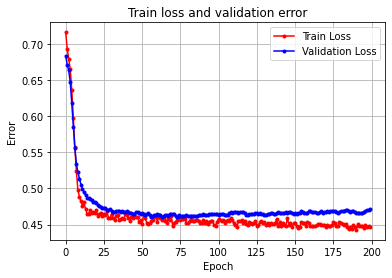

In [359]:
plt.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()

In [365]:
print("Neural netowrk predictions:")

for i in range (0, y_test.size):
    prediction = neural_network.predict(X_test.iloc[i,:].values.reshape(-1,3))
    if round(prediction[0][0])!=y_test.iloc[i]:
        print(f'{X_test.iloc[i,:].values} ----- Real value: {y_test.iloc[i]} Prediction: {prediction[0][0]} ({round(prediction[0][0])})')


Neural netowrk predictions:
[-0.68067941  1.45410605  0.23472156] ----- Real value: 0 Prediction: 0.6260225772857666 (1)
[-0.92789873 -0.77367514 -1.32518623] ----- Real value: 1 Prediction: 0.21816706657409668 (0)
[-0.92789873 -0.77367514 -1.32518623] ----- Real value: 1 Prediction: 0.21816706657409668 (0)
[-0.92789873 -0.77367514 -1.32518623] ----- Real value: 1 Prediction: 0.21816706657409668 (0)
[-0.92789873  1.45410605  0.93257504] ----- Real value: 1 Prediction: 0.4479660987854004 (0)
[-0.68067941 -0.77367514 -1.24308582] ----- Real value: 1 Prediction: 0.19108045101165771 (0)
[-0.68067941  0.25453156 -0.2578809 ] ----- Real value: 0 Prediction: 0.5767530798912048 (1)
[ 0.55541721 -0.25957179 -0.2578809 ] ----- Real value: 1 Prediction: 0.12160661816596985 (0)
[-0.55706975  6.93787513  2.61563344] ----- Real value: 1 Prediction: 0.4793936610221863 (0)
[ 0.55541721 -0.43093957 -0.62733274] ----- Real value: 1 Prediction: 0.11030584573745728 (0)
[-0.68067941 -0.60230736 -1.24308582

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

acc = accuracy_score(y_test, logistic_regression.predict(X_test))
print("Model accuracy is {0:0.2f}".format(acc))

conf_matrix = confusion_matrix(y_test, logistic_regression.predict(X_test))
print(conf_matrix)

Model accuracy is 0.76
[[80  0]
 [27  6]]


In [377]:
import warnings
warnings.filterwarnings('ignore')

print('Accuracy over training data is ', \
      accuracy_score(y_train, logistic_regression.predict(X_train)))

print('Accuracy over testing data is ', \
      accuracy_score(y_test, logistic_regression.predict(X_test)))

Accuracy over training data is  0.7763779527559055
Accuracy over testing data is  0.7610619469026548
